In [1]:
!pip install -q sklearn

In [2]:
%tensorflow_version 2.x
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output
from six.moves import urllib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(tf.__version__)

2.5.0


**Tensors** are the basic building blocks of tensorflow, it represents graphs that can produce it's own individual outputs, there can be numerous tensors that exists for a model, and when a session runs a series of tensors produces outputs up till the final result of the model.   

Tensors can have ranks, a rank 1 tensor represents a vector whereas a rank 2 and above represent matrices, but unlike those in numpy arrays these tensors can have varying datatypes. 

They can be of 4 types:
* Variable  
* Constant  
* Placeholder  
* SparseTensor  

And can be created as below: 



In [4]:
rank1_tensor = tf.Variable(['My','Name','is','Anandu'], tf.string)
rank2_tensor = tf.Variable([['Anandu R','Software Engineer','SOTI'],['Aishwarya Michael','Software Engineer','Infosys']])

In [5]:
print(f'\nTensor 1: \n\tRank: {tf.rank(rank1_tensor)}\n\tShape: {rank1_tensor.shape}')
print(f'\nTensor 2: \n\tRank: {tf.rank(rank2_tensor)}\n\tShape: {rank2_tensor.shape}')


Tensor 1: 
	Rank: 1
	Shape: (4,)

Tensor 2: 
	Rank: 2
	Shape: (2, 3)


Reshaping tensors

In [6]:
tf.reshape(rank2_tensor, (3,2))

<tf.Tensor: shape=(3, 2), dtype=string, numpy=
array([[b'Anandu R', b'Software Engineer'],
       [b'SOTI', b'Aishwarya Michael'],
       [b'Software Engineer', b'Infosys']], dtype=object)>

# Linear regression

For linearly correlated datapoints in $\mathit{R^{n}}$ space

In [7]:
df_train = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df_eval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
y_train = df_train.pop("survived")
y_eval = df_eval.pop("survived")

In [8]:
df_train.head(6)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,male,2.0,3,1,21.0750,Third,unknown,Southampton,n


# 2.0 Analysis

## 2.1 class

### 2.1.1 Unique values

In [9]:
[val for val in df_train['class'].unique()]

['Third', 'First', 'Second']

### 2.1.x Stacked survival stats

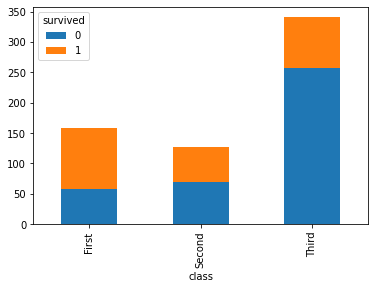

In [10]:
df = pd.DataFrame(pd.concat([df_train, y_train], axis = 1).groupby("class")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'class', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'class')

## 2.2 Alone

### 2.2.1 Unique Values

In [11]:
[val for val in df_train['alone'].unique()]

['n', 'y']

### 2.2.x Stacked survival stats

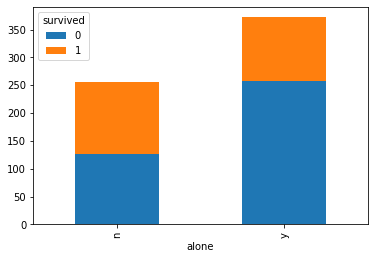

In [12]:
df = pd.DataFrame(pd.concat([df_train, y_train], axis = 1).groupby("alone")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'alone', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'alone')

## 2.3 Sex

### 2.3.1 Unique values

In [13]:
[val for val in df_train['sex'].unique()]

['male', 'female']

### 2.3.x Stacked survival stats

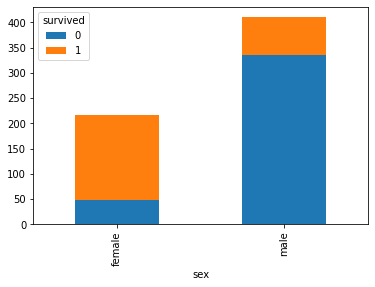

In [14]:
df = pd.DataFrame(pd.concat([df_train, y_train], axis = 1).groupby("sex")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'sex', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'sex')

## 2.4 Embarked Town

### 2.4.1 Unique values

In [15]:
[val for val in df_train['embark_town'].unique()]

['Southampton', 'Cherbourg', 'Queenstown', 'unknown']

### 2.4.x Stacked survival stats

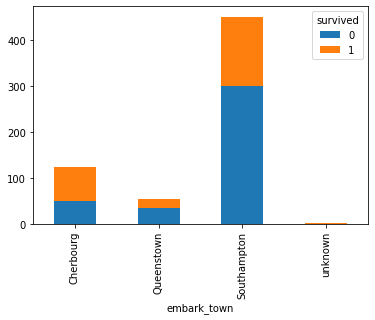

In [16]:
df = pd.DataFrame(pd.concat([df_train, y_train], axis = 1).groupby("embark_town")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'embark_town', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'embark_town')

## 2.5 Deck 

### 2.5.x Stacked survival stats

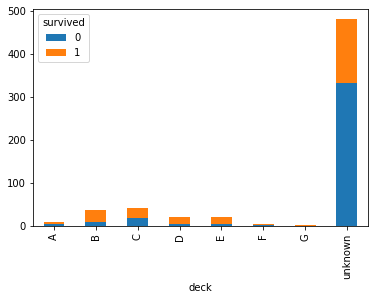

In [17]:
df = pd.DataFrame(pd.concat([df_train, y_train], axis = 1).groupby("deck")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'deck', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'deck')

## 2.6 Parch

### 2.6.1 Unique values

In [18]:
[val for val in df_train['parch'].unique()]

[0, 1, 2, 5, 3, 4]

### 2.6.x Stacked survival stats

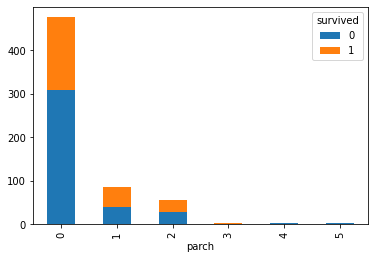

In [19]:
df = pd.DataFrame(pd.concat([df_train, y_train], axis = 1).groupby("parch")['survived'].value_counts())
df = df.rename(columns={'survived':'count'}).pivot_table(index = 'parch', values = 'count', columns = 'survived').reset_index()
df.plot(kind = "bar", stacked = True, x = 'parch')

## 2.7 Fare

### 2.7.1 Stacked survival status

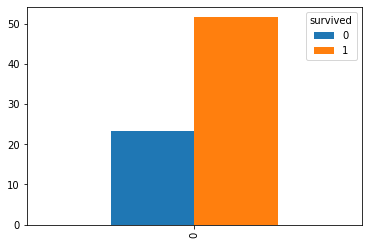

In [20]:
df = pd.DataFrame(pd.concat([df_train, y_train], axis = 1).groupby("survived")['fare'].mean())
df = df.rename(columns={'fare':'mean'}).pivot_table(values = 'mean', columns = 'survived').reset_index(drop = True)
df.plot(kind = "bar", stacked = False)

## 2.8 Age

### 2.8.1 Stacked survival stats

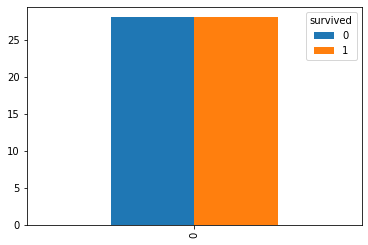

In [21]:
df = pd.DataFrame(pd.concat([df_train, y_train], axis = 1).groupby("survived")['age'].median())
df = df.rename(columns={'age':'median'}).pivot_table(values = 'median', columns = 'survived').reset_index(drop = True)
df.plot(kind = "bar", stacked = False)